In [51]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [52]:
def train_test_split(X, y, test_size=0.2, random_state=42):

    np.random.seed(random_state)

    n_samples = len(X)

    indices = np.random.permutation(n_samples)

    test_count = int(n_samples * test_size)

    test_indices = indices[:test_count]

    train_indices = indices[test_count:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]



In [53]:
def accuracy(y_true, y_pred):

    correct = np.sum(y_true == y_pred)

    return correct / len(y_true)

In [54]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

In [55]:
class DecisionTree:
  def __init__(self, max_depth=5):
    self.max_depth = max_depth
    self.root = None

  def fit(self, X, y):
    self.root = self._build_tree(X, y, depth=0)

  def _build_tree(self, X, y, depth):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    if n_labels == 1 or depth >= self.max_depth:
      leaf_value = self._most_common_label(y)
      return Node(value = leaf_value)

    best_feature , best_threshold = self._best_split(X, y)

    left_indices = X[:, best_feature] <= best_threshold
    right_indices = X[:, best_feature] > best_threshold

    left_child = self._build_tree(X[left_indices], y[left_indices], depth+1)
    right_child = self._build_tree(X[right_indices], y[right_indices], depth+1)

    return Node(best_feature, best_threshold, left_child, right_child)


  def _best_split(self, X, y):
    best_gain = -1
    split_feature = None
    split_threshold = None

    n_features = X.shape[1]
    for feature in range(n_features):
      thresholds = np.unique(X[:, feature])

      for threshold in thresholds:
        gain = self._information_gain(X[:, feature], y, threshold)

        if gain > best_gain:
          best_gain = gain
          split_feature = feature
          split_threshold = threshold
    return split_feature, split_threshold


  def  _information_gain(self, X_column, y, threshold):
    parent_entropy = self._entropy(y)
    left_indices = X_column <= threshold
    right_indices = X_column > threshold

    if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
      return 0
    n = len(y)
    n_left = len(y[left_indices])
    n_right = len(y[right_indices])

    left_entropy = self._entropy(y[left_indices])
    right_entropy = self._entropy(y[right_indices])

    child_entropy = (n_left/n) * left_entropy + (n_right/n) * right_entropy
    return parent_entropy - child_entropy

  def _entropy(self, y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    entropy = 0
    for p in probabilities:
      if p > 0:
        entropy -= p*np.log2(p)

    return entropy


  def _most_common_label(self, y):
    counter = Counter(y)
    return counter.most_common(1)[0][0]

  def predict(self, X):

     predictions = []
     for x in X:
       predictions.append(self._predict_one(x, self.root))
     return np.array(predictions)

  def _predict_one(self, x, node):

     if node.value is not None:
        return node.value

     if x[node.feature] <= node.threshold:
        return self._predict_one(x, node.left)
     else:
         return self._predict_one(x, node.right)


In [56]:
from sklearn.datasets import make_classification

X, y = make_classification(

    n_samples=500,

    n_features=2,

    n_informative=2,

    n_redundant=0,

    n_clusters_per_class=1,

    random_state=42
)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
model = DecisionTree(max_depth=5)
model.fit(X_train, y_train)

In [59]:
predictions = model.predict(X_test)

In [60]:
acc = accuracy(y_test, predictions)

print("Accuracy:", acc)

Accuracy: 0.91


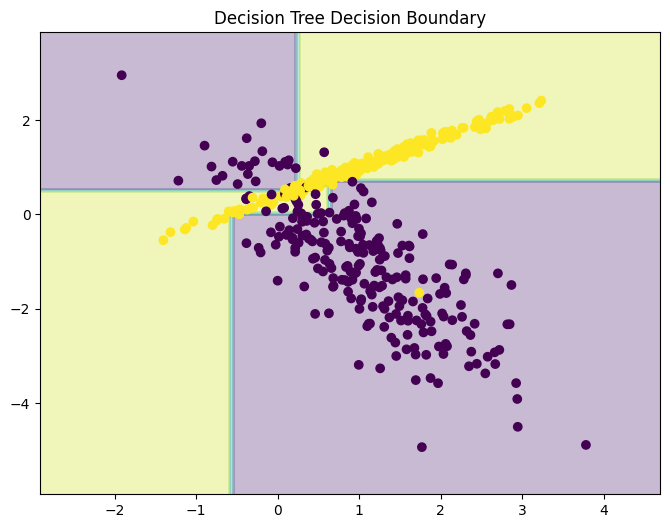

In [61]:
h = 0.1

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1

y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(

    np.arange(x_min, x_max, h),

    np.arange(y_min, y_max, h)
)

grid = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(grid)

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X[:,0], X[:,1], c=y)

plt.title("Decision Tree Decision Boundary")

plt.show()


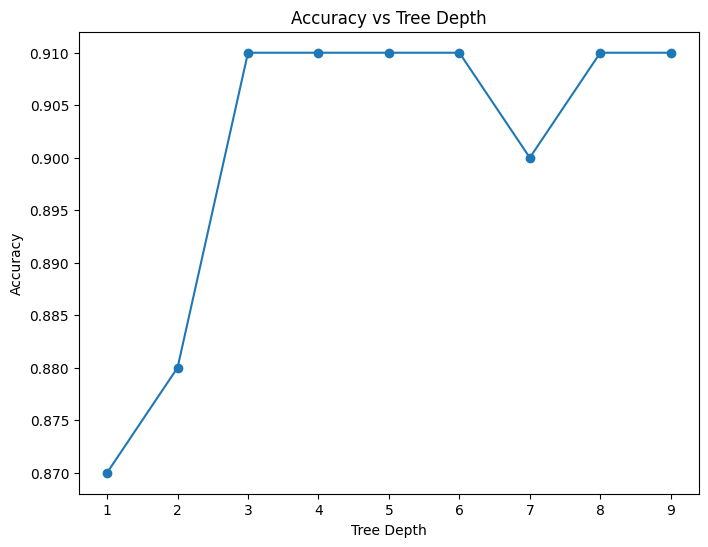

In [62]:
depths = range(1, 10)

accuracies = []

for depth in depths:

    temp_model = DecisionTree(max_depth=depth)

    temp_model.fit(X_train, y_train)

    preds = temp_model.predict(X_test)

    acc = accuracy(y_test, preds)

    accuracies.append(acc)


plt.figure(figsize=(8,6))

plt.plot(depths, accuracies, marker='o')

plt.xlabel("Tree Depth")

plt.ylabel("Accuracy")

plt.title("Accuracy vs Tree Depth")

plt.show()


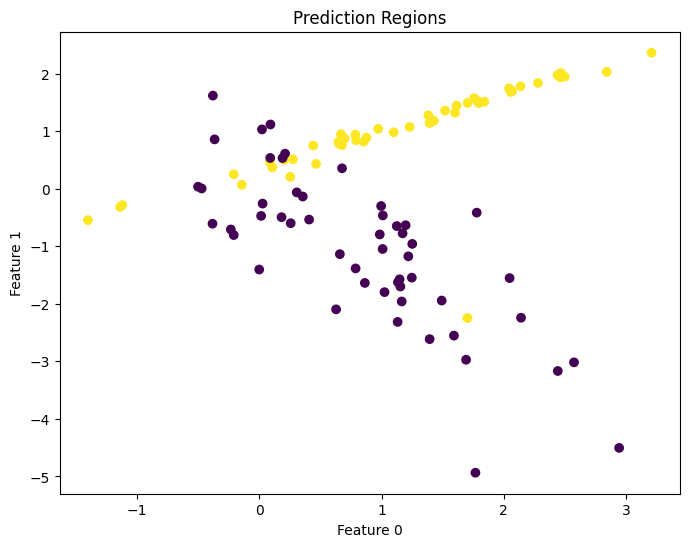

In [63]:
plt.figure(figsize=(8,6))

plt.scatter(X_test[:,0], X_test[:,1], c=predictions)

plt.title("Prediction Regions")

plt.xlabel("Feature 0")

plt.ylabel("Feature 1")

plt.show()
